# [TEMPLATE] DATASET DEPURADO

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)
sns.set(style="darkgrid") # seteando tipo de grid en seaborn
sns.set(color_codes=True)

In [3]:
df = pd.read_csv('./data/train.csv', dtype={'id':'uint32', 'provincia':'category',
                                            'tipodepropiedad':'category', 'gimnasio':'bool',
                                            'usosmultiples':'bool', 'piscina':'bool', 'escuelascercanas':'bool',
                                            'centroscomercialescercanos':'bool'})

# OJO, debe tener el archivo train.csv en la carpeta data.

In [4]:
df['antiguedad'] = df['antiguedad'].fillna(-1)
df['antiguedad'] = df['antiguedad'].astype(np.int8)
df['habitaciones'] = df['habitaciones'].fillna(-1)
df['habitaciones'] = df['habitaciones'].astype(np.int8)
df['garages'] = df['garages'].fillna(-1)
df['garages'] = df['garages'].astype(np.int8)
df['banos'] = df['banos'].fillna(-1)
df['banos'] = df['banos'].astype(np.int8)
df['idzona'] = df['idzona'].fillna(-1)
df['idzona'] = df['idzona'].astype(np.int32)
df['metroscubiertos'] = df['metroscubiertos'].fillna(-1)
df['metroscubiertos'] = df['metroscubiertos'].astype(np.int16)
df['metrostotales'] = df['metrostotales'].fillna(-1)
df['metrostotales'] = df['metrostotales'].astype(np.int16)
df['precio'] = df['precio'].astype(np.uint32)
df['fecha'] = pd.to_datetime(df['fecha'])

# OJO, los valores "-1" representan nulls.

# Superficie Total

In [5]:
datos = df.loc[(df['antiguedad'] > 0) & (df['metrostotales'] > 0)]

In [6]:
datos.shape

(113450, 23)

In [9]:
datos = datos.groupby('antiguedad').agg({"metrostotales":"mean"}).reset_index()

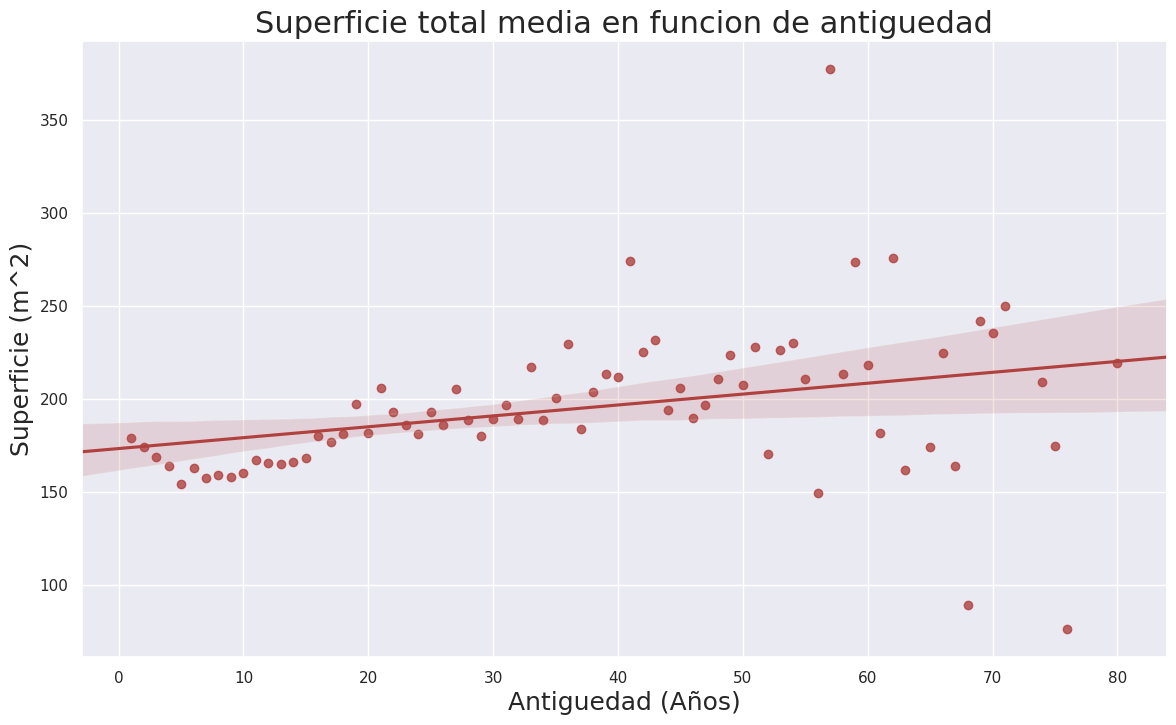

In [19]:
plt.figure(figsize=(14, 8))
g = sns.regplot(x=datos["antiguedad"], y=datos["metrostotales"], color='#B0413E')
g.set_title("Superficie total media en funcion de antiguedad", fontsize=22)
g.set_xlabel("Antiguedad (Años)",fontsize=18)
g.set_ylabel("Superficie (m^2)", fontsize=18)
g.figure.savefig("superficie total media en funcion de antiguedad.png")

# Superficie Cubierta

In [20]:
datos_cubiertos = df.loc[(df['antiguedad'] > 0) & (df['metroscubiertos'] > 0)]

In [21]:
datos_cubiertos = datos_cubiertos.groupby('antiguedad').agg({"metroscubiertos":"mean"}).reset_index()

In [ ]:
plt.figure(figsize=(14, 8))
g = sns.regplot(x=datos_cubiertos["antiguedad"], y=datos_cubiertos["metroscubiertos"], color='#548687')
g.set_title("Superficie cubierta media en funcion de antiguedad", fontsize=22)
g.set_xlabel("Antiguedad (Años)",fontsize=18)
g.set_ylabel("Superficie (m^2)", fontsize=18)
g.figure.savefig("superficie cubierta media en funcion de antiguedad.png")